In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['axes.unicode_minus'] = False
import os

读取 performance 数据

In [2]:
path_list = []
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        if 'performance' in filename:
            path = os.path.join(dirname, filename)
            path_list.append(path)

定义颜色和线条类型字典

In [3]:
label_dict = {
    'random': 'red',
    'rule_based_v1': 'blue',
    'rule_based_v2': 'green',
    'self play': 'gray',
    'to_pretrained_nfsp': 'orange',
    'to_pretrained_dqn': 'pink',
}

遍历所有 performance 文件，绘制 reward 随 episode 的折线图

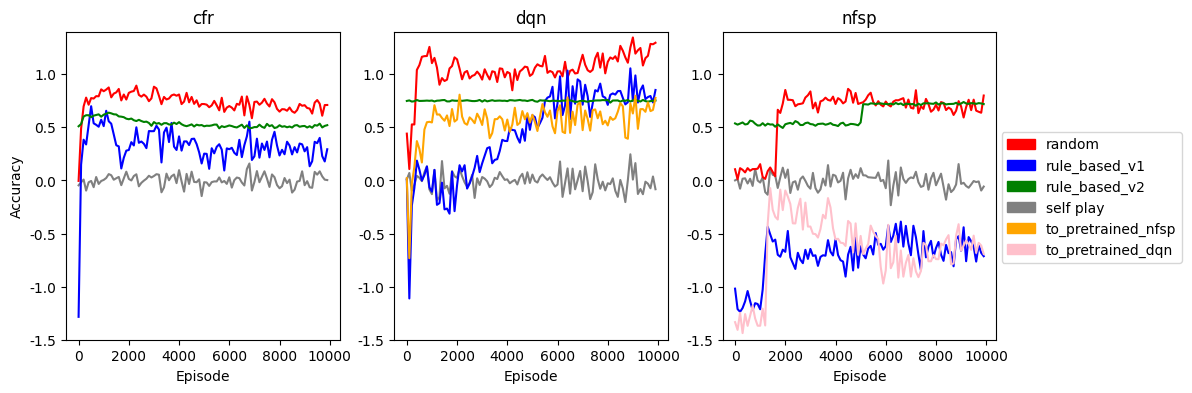

In [4]:
color_dict = {
    'random': 'red',
    'rule_based_v1': 'blue',
    'rule_based_v2': 'green',
    'cfr': 'gray',
    'dqn': 'gray',
    'nfsp': 'gray',
    'to_pretrained_nfsp': 'orange',
    'to_pretrained_dqn': 'pink',
}
# 创建画布和子图
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
for path in sorted(path_list):
    df = pd.read_csv(path, index_col=0)
    algo = path.split("_", -1)[2]
    if algo == "cfr":
        ax = axes[0]
        ax.set_ylabel("Accuracy")
    elif algo == "dqn":
        ax = axes[1]
    elif algo == "nfsp":
        ax = axes[2]
    train_mode = "_".join(path.split("leduc_holdem_", -1)[1].split("_")[1:-1])
    if train_mode in ["cfr", "dqn", "nfsp"]:
        label = "self play"
    elif train_mode == "to_pretrained_nfsp":
        label = "with pretrained nfsp"
    elif train_mode == "to_pretrained_dqn":
        label = "with pretrained dqn"
    else:
        label = train_mode
    ax.plot(df["reward"], label=label, color=color_dict[train_mode])
    ax.set_xlabel("Episode")
    ax.set_ylim([-1.5, 1.4])
    ax.set_title(algo)
plt.legend(loc=(1.02, 0.25), handles=[mpatches.Patch(color=label_dict[label], label=label) for label in label_dict.keys()])
plt.show()
fig.savefig(
    "./plot_performace.png",
    format="png",
    facecolor="white",
    bbox_inches="tight",
)
fig.savefig(
    "./plot_performace.pdf",
    format="pdf",
    facecolor="white",
    bbox_inches="tight",
)